# Proyecto Inteligencia Computacional 

In [1]:
import pandas as pd 
import numpy as np
import pyarrow.parquet as pq
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

feats = pd.read_parquet('./data/features.parquet') 
lcs = pd.read_parquet('./data/lcs.parquet') 
oids = pd.read_parquet('./data/oids.parquet')

In [2]:
# DataFrame con todas las features de cada objeto + la clase a la que pertenecen
df_feats_class = pd.merge(oids, feats, how="inner", on="oid", sort=True)


## Versión Actual

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
# DataFrame con todas las features de cada objeto + la clase a la que pertenecen
df_feats_class = pd.merge(oids, feats, how="inner", on="oid", sort=True)
df_feats_for_forest = df_feats_class[df_feats_class.columns[1:]]
arr_class = df_feats_for_forest[df_feats_for_forest.columns[0]].values
df_feats_for_forest

,alerceclass,Q31_r,Rcs_r,Skew_r,SmallKurtosis_r,Std_r,StetsonK_r,Pvar_r,ExcessVar_r,PairSlopeTrend_r,...,max_diffmaglim_after_fid_g,median_diffmaglim_after_fid_g,delta_mag_fid_r,delta_mjd_fid_r,first_mag_r,mean_mag_r,min_mag_r,n_det_r,PercentAmplitude_r,Harmonics_mag_5_r
0,LPV,1.464396,0.215017,-0.173195,-0.741959,0.976239,0.900859,1.0,0.002542,0.033333,...,20.823200,19.508801,4.200617,1339.718634,17.564814,18.677803,16.661703,628.0,0.112910,0.270302
1,RRL,0.366083,0.104706,0.405444,-1.552645,0.192603,0.883649,1.0,0.000132,-0.100000,...,21.066299,20.175400,0.580561,1251.693287,16.485819,16.641393,16.403305,320.0,0.027691,0.009083
2,LPV,2.839326,0.314243,0.001261,-1.538020,1.494441,0.800329,1.0,0.009013,0.300000,...,21.126600,20.008301,5.057098,1434.977350,16.880259,15.694755,13.155277,656.0,0.180732,0.105483
3,EB,0.029942,0.087856,2.875995,8.698949,0.476514,0.543303,1.0,0.000773,0.033333,...,20.865801,19.922400,2.519390,1189.854849,16.813747,17.039993,16.799618,93.0,0.145533,0.028314
4,LPV,1.512813,0.298351,-0.484697,-0.732266,1.037921,0.791008,1.0,0.004826,-0.233333,...,20.916500,19.762699,5.000990,1338.672627,13.901798,14.856612,12.674696,479.0,0.172507,0.097117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,CEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.019199,19.309700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8415,RRL,0.389800,0.259549,0.506888,-1.274300,0.202627,0.925235,1.0,0.000000,0.033333,...,20.693900,20.560050,0.483679,28.936458,16.840920,17.002280,16.805649,8.0,0.024969,3.964182
8416,DSCT,0.457832,0.359654,0.324823,-1.448713,0.219106,0.893713,1.0,0.000203,-0.100000,...,20.815800,20.049101,0.595043,353.070185,15.650616,15.353477,15.068784,24.0,0.024223,2.072808
8417,RRL,0.347692,0.136953,0.130523,-0.614194,0.192589,0.830999,1.0,0.000217,0.100000,...,20.883900,20.081400,0.794328,375.932407,13.234352,13.045922,12.675948,24.0,0.034678,0.022427


In [5]:
# Suponiendo que 'feats' es tu DataFrame y 'target' es la columna de etiquetas
X_forest = df_feats_for_forest.drop(columns=['alerceclass'])  # Reemplaza 'target' con el nombre de tu columna de etiquetas
y_forest = df_feats_for_forest['alerceclass']  # Reemplaza 'target' con el nombre de tu columna de etiquetas

# Entrenar el modelo RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, 
                            criterion="gini",
                            max_features="sqrt",
                            bootstrap=True,
                            max_samples=2/3,
                            oob_score=True,
                            random_state=42
                            ,class_weight="balanced")
clf.fit(X_forest, y_forest)

# Obtener la importancia de las características
feature_importances = clf.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({
    'Feature': X_forest.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df


,Feature,Importance
115,Multiband_period_g_r,0.077157
117,Period_band_g,0.061812
119,Period_band_r,0.056347
48,g-r_mean_g_r,0.033195
49,g-r_max_corr_g_r,0.031238
...,...,...
27,SPM_tau_rise_r,0.000592
56,MHPS_PN_flag_g,0.000365
76,Pvar_g,0.000180
6,Pvar_r,0.000152


# Act MTP2

In [6]:
importance_df_ = importance_df[importance_df.columns[:-1]].head(60)
importance_arr = importance_df_["Feature"].values

df_feats_for_auto = df_feats_for_forest[importance_arr]
df_feats_for_auto.insert(0, "alerceclass", df_feats_for_forest['alerceclass'].values)
df_feats_for_auto['alerceclass'].value_counts()


alerceclass
EB      2689
RRL     2652
LPV     1374
CEP     1172
DSCT     532
Name: count, dtype: int64

In [7]:
# Extraer 50 filas de df_feats_for_auto para cada clase
df_test = df_feats_for_auto.groupby('alerceclass').apply(lambda x: x.sample(n=60, random_state=42)).reset_index(drop=True)
#Primero definimos un conjunto test balanceado con 50 elementos de cada clase
X_test = df_test.drop(columns=['alerceclass'])
y_test = df_test['alerceclass']

# Eliminar los elementos de df_test de df_feats_for_auto
df_auto=pd.concat([df_feats_for_auto,df_test]).drop_duplicates(keep=False)


#df_test
df_auto['alerceclass'].value_counts()
df_feats_for_auto['alerceclass'].value_counts()


C:\Users\nicos\AppData\Local\Temp\ipykernel_34168\2934829519.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_test = df_feats_for_auto.groupby('alerceclass').apply(lambda x: x.sample(n=60, random_state=42)).reset_index(drop=True)


alerceclass
EB      2689
RRL     2652
LPV     1374
CEP     1172
DSCT     532
Name: count, dtype: int64

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle

#Primero definimos un conjunto test balanceado con 60 elementos de cada clase
df_test_val = df_feats_for_auto.groupby('alerceclass').apply(lambda x: x.sample(n=60, random_state=42)).reset_index(drop=True)
X_test_val = df_test.drop(columns=['alerceclass'])
y_test_val = df_test['alerceclass']

# Eliminar los elementos de df_test de df_feats_for_auto
df_auto = pd.concat([df_feats_for_auto,df_test]).drop_duplicates(keep=False)

df_val=df_auto.groupby('alerceclass').apply(lambda x: x.sample(n=60, random_state=42)).reset_index(drop=True)
X_val = df_val.drop(columns=['alerceclass'])
y_val = df_val['alerceclass']

df_train = pd.concat([df_auto,df_val]).drop_duplicates(keep=False)
X_train = df_train.drop(columns=['alerceclass'])
y_train = df_train['alerceclass']


#Imputar los NaN por el valor más frecuente en el conjunto de entrenamiento
imputer = SimpleImputer(strategy='most_frequent')
imputed_X_train = imputer.fit_transform(X_train)
imputed_X_val = imputer.transform(X_val)
imputed_X_test = imputer.transform(X_test)

# Normalizar los datos usando las constantes del conjunto de entrenamiento
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(imputed_X_train)
X_val = scaler.transform(imputed_X_val)
X_test = scaler.transform(imputed_X_test)

#Función para realizar upsampling
def upsample_data(X, y):
    df = pd.concat([pd.DataFrame(X), y.reset_index(drop=True)], axis=1)
    class_counts = y.value_counts()
    max_class_count = class_counts.max()
    
    df_upsampled = pd.DataFrame()
    for class_label in class_counts.index:
        df_class = df[df['alerceclass'] == class_label]
        df_class_upsampled = resample(df_class, 
                                      replace=True,  # Muestreo con reemplazo
                                      n_samples=max_class_count,  # Número de muestras igual a la clase mayoritaria
                                      random_state=42)
        df_upsampled = pd.concat([df_upsampled, df_class_upsampled], axis=0)
    
    df_upsampled = shuffle(df_upsampled, random_state=42)
    return df_upsampled.drop(columns=['alerceclass']).values, df_upsampled['alerceclass']

# Realizar upsampling en el conjunto de entrenamiento
X_train, y_train = upsample_data(scaled_X_train, y_train)


# Mostrar los resultados
print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts())
print("\nDistribución de clases en el conjunto de validación:")
print(y_val.value_counts())
print("\nDistribución de clases en el conjunto de prueba:")
print(y_test.value_counts())


C:\Users\nicos\AppData\Local\Temp\ipykernel_34168\3952076495.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_test_val = df_feats_for_auto.groupby('alerceclass').apply(lambda x: x.sample(n=60, random_state=42)).reset_index(drop=True)
C:\Users\nicos\AppData\Local\Temp\ipykernel_34168\3952076495.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_val=df_auto.groupby('alerceclass').apply(lambda x: x.

Distribución de clases en el conjunto de entrenamiento:
alerceclass
LPV     2569
DSCT    2569
CEP     2569
RRL     2569
EB      2569
Name: count, dtype: int64

Distribución de clases en el conjunto de validación:
alerceclass
CEP     60
DSCT    60
EB      60
LPV     60
RRL     60
Name: count, dtype: int64

Distribución de clases en el conjunto de prueba:
alerceclass
CEP     60
DSCT    60
EB      60
LPV     60
RRL     60
Name: count, dtype: int64


# Autoencoder

In [9]:
class EarlyStopping:
    def __init__(self, n_epochs_tolerance):
        self.n_epochs_tolerance = n_epochs_tolerance
        self.epochs_with_no_improvement = 0
        self.best_loss = np.inf

    def __call__(self, val_loss):
        # En cada llamada aumentamos el número de épocas en que no hemos mejorado
        self.epochs_with_no_improvement += 1

        if val_loss <= self.best_loss:
            # Si efectivamente mejoramos (menor loss de validación) reiniciamos el número de épocas sin mejora
            self.best_loss = val_loss
            self.epochs_with_no_improvement = 0

        # Retornamos True si debemos detenernos y False si aún no
        # Nos detenemos cuando el número de épocas sin mejora es mayor o igual que el número de épocas de tolerancia
        return self.epochs_with_no_improvement >= self.n_epochs_tolerance

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

def show_curves(all_curves):

    final_curve_means = {k: np.mean([c[k] for c in all_curves], axis=0) for k in all_curves[0].keys()}
    final_curve_stds = {k: np.std([c[k] for c in all_curves], axis=0) for k in all_curves[0].keys()}

    fig, ax = plt.subplots(figsize=(7, 5))
    fig.set_facecolor('white')

    epochs = np.arange(len(final_curve_means["val_loss"])) + 1

    ax.plot(epochs, final_curve_means['val_loss'], label='validation')
    ax.plot(epochs, final_curve_means['train_loss'], label='training')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title('Loss evolution during training')
    ax.legend()

    plt.show()

def get_metrics_and_confusion_matrix(model, dataset):
    model.cpu()
    model.eval()
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=min(16, len(dataset)))
    y_true = []
    y_pred = []
    for x, y in dataloader:
        y_true.append(y)
        y_pred.append(model(x).argmax(dim=1))

    y_true = torch.cat(y_true)
    y_pred = torch.cat(y_pred)

    print(f"Accuracy: {accuracy_score(y_true, y_pred) * 100:.2f}%")

    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=data_json["mapping"][1:], xticks_rotation="vertical")
    plt.show()

In [11]:
import time

def train_step(x_batch, y_batch, model, optimizer, criterion, use_gpu):
    # Predicción
    y_predicted = model(x_batch)

    # Cálculo de loss
    loss = criterion(y_predicted, y_batch)

    # Actualización de parámetros
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return y_predicted, loss


def evaluate(val_loader, model, criterion, use_gpu):
    cumulative_loss = 0
    cumulative_predictions = 0
    data_count = 0

    for x_val, y_val in val_loader:
        if use_gpu:
            x_val = x_val.cuda()
            y_val = y_val.cuda()

        y_predicted = model(x_val)

        loss = criterion(y_predicted, y_val)

        class_prediction = torch.argmax(y_predicted, axis=1).long()

        cumulative_predictions += (y_val == class_prediction).sum().item()
        cumulative_loss += loss.item() * y_val.shape[0]
        data_count += y_val.shape[0]

    val_acc = cumulative_predictions / data_count
    val_loss = cumulative_loss / data_count

    return val_acc, val_loss


def train_model(
    model,
    train_dataset,
    val_dataset,
    epochs,
    criterion,
    batch_size,
    lr,
    n_evaluations_per_epoch=6,
    early_stopping_tolerance=15,
    use_gpu=False
):
    if use_gpu:
        model.cuda()
    
    
    early_stopping = EarlyStopping(n_epochs_tolerance=early_stopping_tolerance)

    # Definición de dataloader
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=1, pin_memory=use_gpu)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, pin_memory=use_gpu)

    # Optimizador
    optimizer = optim.RMSprop(model.parameters(), lr=lr, alpha=0.99)

    # Listas para guardar curvas de entrenamiento
    curves = {
        "train_acc": [],
        "val_acc": [],
        "train_loss": [],
        "val_loss": [],
    }

    # Early stopping
    n_epochs_with_no_improvement = 0
    stop = False

    t0 = time.perf_counter()

    iteration = 0

    n_batches = len(train_loader)
    print(n_batches)

    for epoch in range(epochs):
        print(f"\rEpoch {epoch + 1}/{epochs}")
        cumulative_train_loss = 0
        cumulative_train_corrects = 0
        examples_count = 0

        # Entrenamiento del modelo
        model.train()
        for i, (x_batch, y_batch) in enumerate(train_loader):
            if use_gpu:
                x_batch = x_batch.cuda()
                y_batch = y_batch.cuda()

            y_predicted, loss = train_step(x_batch, y_batch, model, optimizer, criterion, use_gpu)

            cumulative_train_loss += loss.item() * x_batch.shape[0]
            examples_count += y_batch.shape[0]

            # Calculamos número de aciertos
            class_prediction = torch.argmax(y_predicted, axis=1).long()
            cumulative_train_corrects += (y_batch == class_prediction).sum().item()

            if (i % (n_batches // n_evaluations_per_epoch) == 0) and (i > 0):
                train_loss = cumulative_train_loss / examples_count
                train_acc = cumulative_train_corrects / examples_count

                print(f"Iteration {iteration} - Batch {i}/{len(train_loader)} - Train loss: {train_loss}, Train acc: {train_acc}")

            iteration += 1

        model.eval()
        with torch.no_grad():
            val_acc, val_loss = evaluate(val_loader, model, criterion, use_gpu)

        print(f"Val loss: {val_loss}", f"Val acc: {val_acc}")

        train_loss = cumulative_train_loss / examples_count

        curves["train_loss"].append(train_loss)
        curves["val_loss"].append(val_loss)

        if early_stopping(val_loss):
            print("Early stopping.")
            break

    print()
    total_time = time.perf_counter() - t0
    print(f"Tiempo total de entrenamiento: {total_time:.4f} [s]")

    model.cpu()

    return curves, total_time

In [12]:
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense
from keras.optimizers import SGD
from keras.optimizers import Adam , Nadam
from keras.optimizers import RMSprop
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from torch import nn
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)


# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

# Create DataLoader for training and validation sets
train_dataset_autoencoder = TensorDataset(X_train_tensor, X_train_tensor)
val_dataset_autoencoder = TensorDataset(X_val_tensor, X_val_tensor)
test_dataset_autoencoder = TensorDataset(X_test_tensor, X_test_tensor)


# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.SELU(),
            nn.Linear(input_dim, 50),
            nn.SELU(),
            nn.Linear(50, 40),
            nn.SELU(),
            nn.Linear(40, 30),
            nn.SELU()
        )
        self.dropout = nn.Dropout(p=0.5)  # Dropout layer with 50% probability
        self.decoder = nn.Sequential(
            nn.Linear(30, 40),
            nn.SELU(),
            nn.Linear(40, 50),
            nn.SELU(),
            nn.Linear(50, input_dim),
            nn.SELU(),
            nn.Linear(input_dim, input_dim)
        )

    def forward(self, x, **kwargs):
        encoded = self.encoder(x)
        #encoded = self.dropout(encoded)  # Apply dropout
        decoded = self.decoder(encoded)
        return decoded


In [13]:
lr = 0.001
batch_size = 32
criterion = nn.MSELoss()
early_stopping_tolerance = 15

epochs = 25

curves_autoencoder = {
    "train_loss": [],
    "val_loss": []
}

input_dim = X_train_tensor.shape[1]
autoencoder = Autoencoder(input_dim)

optimizer = optim.Adam(autoencoder.parameters(), lr=lr)


for epoch in range(epochs):
    autoencoder.train()
    running_loss_train = 0.0
    for inputs, _ in DataLoader(train_dataset_autoencoder, batch_size=batch_size, shuffle=True):
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss_train = criterion(outputs, inputs)
        loss_train.backward()
        optimizer.step()
        running_loss_train += loss_train.item() * inputs.size(0)
    epoch_loss_train = running_loss_train / len(train_dataset_autoencoder)
    curves_autoencoder["train_loss"].append(epoch_loss_train)
    print(f"Epoch {epoch + 1}/{epochs} - Train Loss: {epoch_loss_train}")

    #validamos modelo
    autoencoder.eval()
    running_loss_val = 0.0
    with torch.no_grad():
        for inputs, _ in DataLoader(val_dataset_autoencoder, batch_size=batch_size, shuffle=False):
            outputs = autoencoder(inputs)
            loss_val = criterion(outputs, inputs)
            running_loss_val += loss_val.item() * inputs.size(0)
        epoch_loss_val = running_loss_val / len(val_dataset_autoencoder)
        curves_autoencoder["val_loss"].append(epoch_loss_val)
        print(f"Epoch {epoch + 1}/{epochs} - Val Loss: {epoch_loss_val}")

Epoch 1/25 - Train Loss: 0.47697541946193595
Epoch 1/25 - Val Loss: 2.894358546336492
Epoch 2/25 - Train Loss: 0.3202620529441715
Epoch 2/25 - Val Loss: 2.783624148865541
Epoch 3/25 - Train Loss: 0.265673100146142
Epoch 3/25 - Val Loss: 2.6491648724675176
Epoch 4/25 - Train Loss: 0.2343348934324208
Epoch 4/25 - Val Loss: 2.529520450333754
Epoch 5/25 - Train Loss: 0.20950819605772206
Epoch 5/25 - Val Loss: 2.3774879228075347
Epoch 6/25 - Train Loss: 0.18957916572545
Epoch 6/25 - Val Loss: 2.254995982050896
Epoch 7/25 - Train Loss: 0.16532288335405837
Epoch 7/25 - Val Loss: 1.6527568226555984
Epoch 8/25 - Train Loss: 0.1493664783771839
Epoch 8/25 - Val Loss: 1.0936710964143277
Epoch 9/25 - Train Loss: 0.1336469604944431
Epoch 9/25 - Val Loss: 0.6195464334388574
Epoch 10/25 - Train Loss: 0.11697711027830944
Epoch 10/25 - Val Loss: 0.9368899407982826
Epoch 11/25 - Train Loss: 0.12462270366004025
Epoch 11/25 - Val Loss: 1.2709857525428137
Epoch 12/25 - Train Loss: 0.11147496071903332
Epoch 

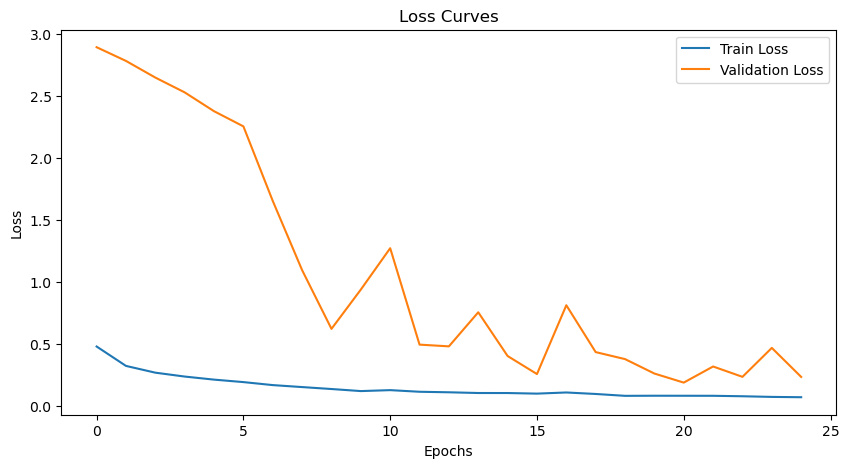

In [14]:
# Plotear las curvas de pérdida
plt.figure(figsize=(10, 5))
plt.plot(curves_autoencoder["train_loss"], label='Train Loss')
plt.plot(curves_autoencoder["val_loss"], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

In [15]:

autoencoder.eval()
# Obtener los embeddings del conjunto de prueba
embeddings_test = []
with torch.no_grad():
    for inputs in X_test_tensor:
        inputs = inputs.unsqueeze(0)  # Añadir una dimensión para el batch
        z = autoencoder.encoder(inputs)
        embeddings_test.append(z.squeeze(0).cpu().numpy())

embeddings_test = np.array(embeddings_test)

c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


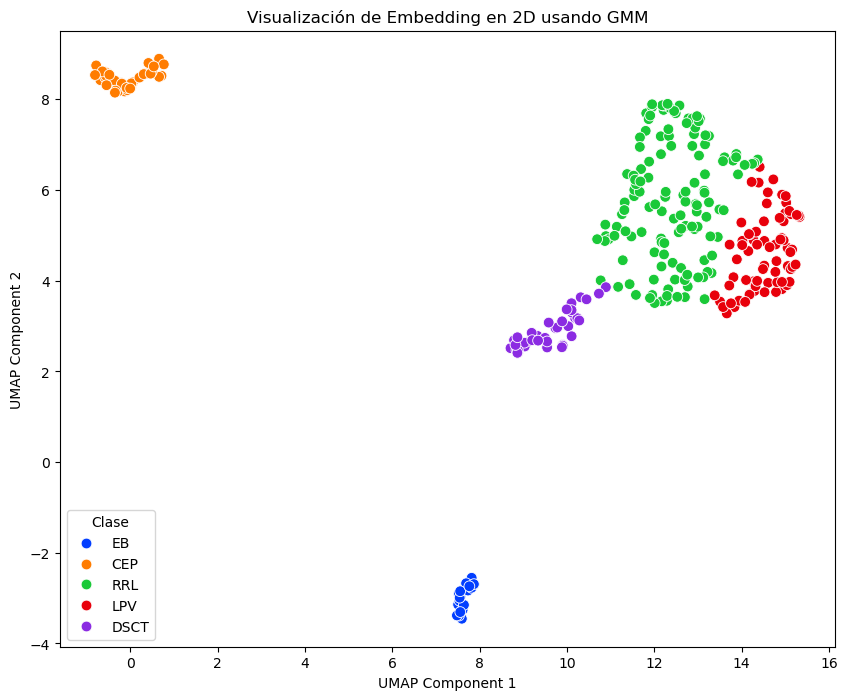

In [16]:
import umap
from sklearn.mixture import GaussianMixture

# Reducir la dimensionalidad usando UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(embeddings_test)

# Crear un DataFrame para facilitar la visualización
df_umap_2d = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])


gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(df_umap_2d)


labels_gmm = gmm.predict(df_umap_2d)
labels_gmm = label_encoder.inverse_transform(labels_gmm) 


df_umap_2d['alerceclass'] = labels_gmm



# Visualizar los datos en 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_umap_2d, x='UMAP1', y='UMAP2', hue='alerceclass', palette='bright', s=60)
plt.title('Visualización de Embedding en 2D usando GMM')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Clase')
plt.show()




# MCDSVDD

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import umap
import matplotlib.pyplot as plt

class MultiClassDeepSVDD(nn.Module):
    def __init__(self, input_dim, z_dim, n_classes):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 50),
            nn.LeakyReLU(),
            nn.Linear(50, 40),
            nn.LeakyReLU(),
            nn.Linear(40, 30),
            nn.LeakyReLU(),
            nn.Linear(30, z_dim)
        )
        self.c = None
        self.n_classes = n_classes

    def forward(self, x):
        z = self.encoder(x)
        return z

    def set_c(self, dataloader, eps=0.01):
        latents, labels = self.get_latent_space(dataloader)
        c = []
        for i in range(self.n_classes):
            ixs = np.where(labels == i)
            c.append(torch.mean(latents[ixs], dim=0))
        c = torch.stack(c)
        for i in range(len(c)):
            c[i][(abs(c[i]) < eps) & (c[i] < 0)] = -eps
            c[i][(abs(c[i]) < eps) & (c[i] > 0)] = eps
        self.c = c.to(next(self.parameters()).device)

    def get_latent_space(self, dataloader):
        latents = []
        labels = []
        with torch.no_grad():
            for x, y in dataloader:
                x, y = x.to(next(self.parameters()).device), y.to(next(self.parameters()).device)
                z = self.forward(x)
                latents.append(z.detach().cpu())
                labels.append(y.detach().cpu())
        return torch.cat(latents), torch.cat(labels)

    def compute_loss(self, x, y):
        z = self.forward(x)
        loss = torch.mean(torch.sum((z - self.c[y]) ** 2, dim=1))
        return loss

    def compute_anomaly_score(self, x):
        z = self.forward(x)
        score = torch.min(torch.sum((z.unsqueeze(1) - self.c) ** 2, dim=2), dim=1)[0]
        return score

#TENSORES
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

#DATASETS
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

#DATALOADER
train_loader_mcdsvdd = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader_mcdsvdd = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader_mcdsvdd = DataLoader(test_dataset, batch_size=32, shuffle=False)


input_dim = X_train_tensor.shape[1]
z_dim = 30
n_classes = len(np.unique(y_train_encoded))

# Crear una instancia del modelo
model_mcdsvdd = MultiClassDeepSVDD(input_dim, z_dim, n_classes)
optimizer = torch.optim.Adam(model_mcdsvdd.parameters(), lr=0.001)
num_epochs = 30

# Establecer el centro c
model_mcdsvdd.set_c(train_loader_mcdsvdd)

curves={
    "train_loss": [],
    "val_loss": []
}

# Entrenar el modelo
for epoch in range(num_epochs):
    model_mcdsvdd.train()
    running_loss_train = 0.0
    running_loss_val = 0.0
    for inputs, labels in train_loader_mcdsvdd:
        inputs, labels = inputs.to(torch.device("cpu")), labels.to(torch.device("cpu"))
        optimizer.zero_grad()
        loss_train = model_mcdsvdd.compute_loss(inputs, labels)
        loss_train.backward()
        optimizer.step()
        running_loss_train += loss_train.item() * inputs.size(0)
    train_loss = running_loss_train / len(train_loader_mcdsvdd.dataset)
    curves["train_loss"].append(train_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Train loss: {train_loss:.4f}')

# Evaluar el modelo para conjunto de validación
    model_mcdsvdd.eval()
    with torch.no_grad():
        for inputs, labels in val_loader_mcdsvdd:
            inputs, labels = inputs.to(torch.device("cpu")), labels.to(torch.device("cpu"))
            loss_val = model_mcdsvdd.compute_loss(inputs, labels)
            running_loss_val += loss_val.item() * inputs.size(0)
        val_loss = running_loss_val / len(val_loader_mcdsvdd.dataset)
        curves["val_loss"].append(val_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Val loss: {val_loss:.4f}')




Epoch 1/30, Train loss: 0.0021
Epoch 1/30, Val loss: 0.0016
Epoch 2/30, Train loss: 0.0006
Epoch 2/30, Val loss: 0.0007
Epoch 3/30, Train loss: 0.0004
Epoch 3/30, Val loss: 0.0006
Epoch 4/30, Train loss: 0.0004
Epoch 4/30, Val loss: 0.0005
Epoch 5/30, Train loss: 0.0003
Epoch 5/30, Val loss: 0.0006
Epoch 6/30, Train loss: 0.0003
Epoch 6/30, Val loss: 0.0010
Epoch 7/30, Train loss: 0.0003
Epoch 7/30, Val loss: 0.0005
Epoch 8/30, Train loss: 0.0002
Epoch 8/30, Val loss: 0.0004
Epoch 9/30, Train loss: 0.0002
Epoch 9/30, Val loss: 0.0005
Epoch 10/30, Train loss: 0.0002
Epoch 10/30, Val loss: 0.0005
Epoch 11/30, Train loss: 0.0002
Epoch 11/30, Val loss: 0.0005
Epoch 12/30, Train loss: 0.0002
Epoch 12/30, Val loss: 0.0005
Epoch 13/30, Train loss: 0.0002
Epoch 13/30, Val loss: 0.0005
Epoch 14/30, Train loss: 0.0002
Epoch 14/30, Val loss: 0.0005
Epoch 15/30, Train loss: 0.0002
Epoch 15/30, Val loss: 0.0005
Epoch 16/30, Train loss: 0.0002
Epoch 16/30, Val loss: 0.0005
Epoch 17/30, Train loss: 0

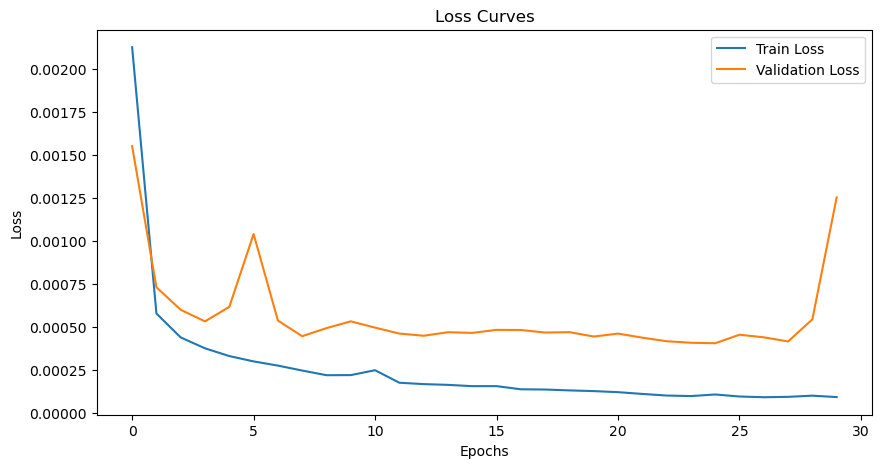

In [18]:
# Plotear las curvas de pérdida

plt.figure(figsize=(10, 5))
plt.plot(curves["train_loss"], label='Train Loss')
plt.plot(curves["val_loss"], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

In [19]:
model_mcdsvdd.compute_anomaly_score(X_test_tensor)

tensor([8.0491e-06, 5.3862e-04, 2.1095e-05, 2.3465e-04, 4.2930e-05, 3.4647e-05,
        1.7021e-04, 5.0738e-05, 1.0460e-04, 1.7546e-05, 9.6091e-06, 1.9154e-05,
        2.5577e-05, 2.3039e-05, 2.1802e-05, 6.1936e-04, 3.7916e-05, 5.4060e-06,
        2.2255e-05, 4.4094e-05, 3.2373e-05, 3.1575e-05, 1.8458e-05, 4.3166e-04,
        9.2979e-06, 9.8476e-05, 8.6557e-05, 1.7074e-04, 1.9472e-05, 1.5277e-05,
        3.3726e-05, 1.6861e-04, 7.4116e-04, 1.5223e-05, 2.4115e-05, 1.6560e-05,
        2.2406e-05, 1.5669e-04, 3.2002e-04, 1.7710e-05, 1.0326e-05, 1.5271e-04,
        1.1402e-05, 1.2195e-05, 3.6104e-05, 5.4194e-05, 1.6470e-03, 3.4434e-05,
        1.4483e-05, 6.7115e-05, 2.0354e-05, 1.6599e-04, 1.9781e-04, 2.0768e-05,
        2.1340e-05, 3.4567e-05, 7.4362e-05, 2.9068e-05, 6.4686e-05, 2.3390e-04,
        7.4477e-06, 1.4726e-04, 3.9248e-05, 5.9841e-06, 2.7030e-05, 1.0554e-04,
        1.2587e-04, 2.2759e-04, 3.6363e-04, 2.7380e-04, 1.2114e-04, 4.4590e-04,
        2.6618e-04, 2.7252e-05, 3.2184e-

c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


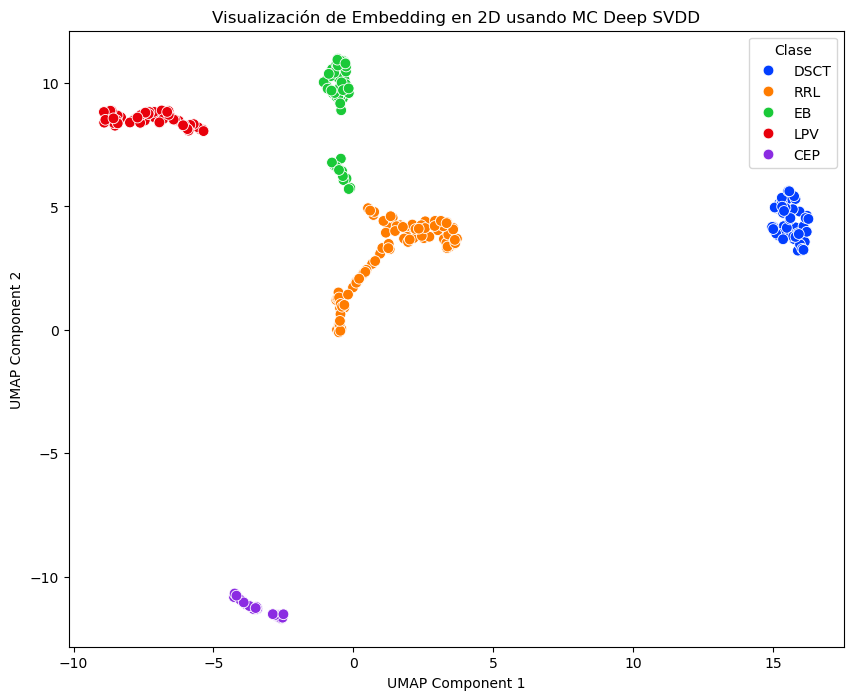

In [20]:
embeddings_test_mcdsvdd = []

# Evaluar el modelo en el conjunto de prueba
model_mcdsvdd.eval()
test_loss = 0.0
with torch.no_grad():
        for inputs in X_test_tensor:
            inputs=inputs.unsqueeze(0)
            z = model_mcdsvdd.forward(inputs)
            embeddings_test_mcdsvdd.append(z.squeeze(0).cpu().numpy())


embeddings_test_mcdsvdd = np.array(embeddings_test_mcdsvdd)

# Reducir la dimensionalidad usando UMAP
reducer = umap.UMAP(random_state=42)
embedding_mcdsvdd = reducer.fit_transform(embeddings_test_mcdsvdd)


# Crear un DataFrame para facilitar la visualización
df_umap_2d = pd.DataFrame(embedding_mcdsvdd, columns=['UMAP1', 'UMAP2'])

gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(df_umap_2d)

labels_gmm_mcdsvdd=gmm.predict(df_umap_2d)
labels_gmm_mcdsvdd=label_encoder.inverse_transform(labels_gmm_mcdsvdd)

df_umap_2d['alerceclass'] = labels_gmm_mcdsvdd

# Visualizar los datos en 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_umap_2d, x='UMAP1', y='UMAP2', hue='alerceclass', palette='bright', s=60)
plt.title('Visualización de Embedding en 2D usando MC Deep SVDD')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Clase')
plt.show()

## Curvas de luz

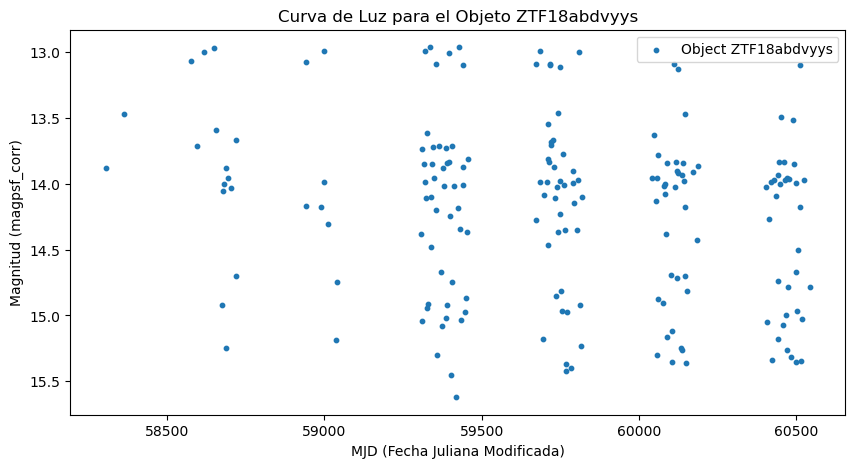

In [21]:
oid = "ZTF18abdvyys"

# Filtrar el dataframe para el objeto actual
star_data = lcs[lcs['oid'] == oid]

# Columnas de tiempo y magnitud
time = star_data['mjd']
magnitude = star_data['magpsf_corr']  # 'magpsf': Sin correxión

# Curva de luz
plt.figure(figsize=(10, 5))
plt.scatter(time, magnitude, s=10, label=f"Object {oid}")
plt.xlabel('MJD (Fecha Juliana Modificada)')
plt.ylabel('Magnitud (magpsf_corr)')
plt.title(f'Curva de Luz para el Objeto {oid}')
plt.gca().invert_yaxis()  # Las magnitudes son inversas (más bajo es más brillante)
plt.legend()
plt.show()

C:\Users\nicos\AppData\Local\Temp\ipykernel_34168\1100354441.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
C:\Users\nicos\AppData\Local\Temp\ipykernel_34168\1100354441.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1


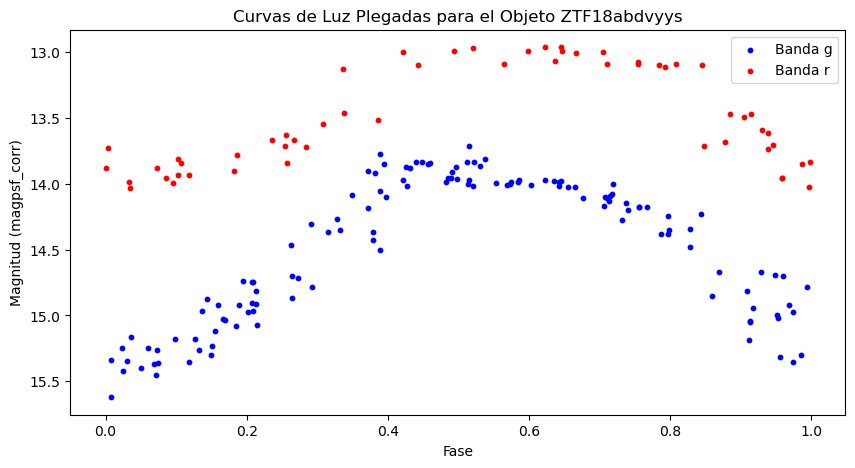

In [22]:
# Fusionar los DataFrames en base a la columna 'oid'
df_merged = pd.merge(lcs, feats[['oid', 'Multiband_period_g_r', 'Period_band_g', 'Period_band_r']], on='oid', how='left')

# Seleccionar el 'oid' del objeto que deseas analizar
oid_interes = 'ZTF18abdvyys'

# Filtrar los datos para el 'oid' seleccionado
datos_estrella = df_merged[df_merged['oid'] == oid_interes]

# Verificar que hay datos disponibles para el 'oid' seleccionado
if not datos_estrella.empty:
    # Calcular la fase para cada observación
    mjd_0 = datos_estrella['mjd'].min()  # Época de referencia

    # Crear una columna de fase para cada banda
    datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
    datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1

    # Filtrar por banda utilizando 'fid' (1 para g, 2 para r)
    datos_g = datos_estrella[datos_estrella['fid'] == 1]
    datos_r = datos_estrella[datos_estrella['fid'] == 2]

    # Graficar las curvas de luz plegadas
    plt.figure(figsize=(10, 5))
    if not datos_g.empty:
        plt.scatter(datos_g['fase_g'], datos_g['magpsf_corr'], s=10, color='blue', label='Banda g')
    if not datos_r.empty:
        plt.scatter(datos_r['fase_r'], datos_r['magpsf_corr'], s=10, color='red', label='Banda r')
    plt.xlabel('Fase')
    plt.ylabel('Magnitud (magpsf_corr)')
    plt.title(f'Curvas de Luz Plegadas para el Objeto {oid_interes}')
    plt.gca().invert_yaxis()  # Las magnitudes son inversas
    plt.legend()
    plt.show()
else:
    print(f"No se encontraron datos para el objeto con oid {oid_interes}.")